In [10]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("2008_Dogs.csv")
x = dataset[['OwnerZip', 'ExpYear']].values  # Example numeric features
df = pd.DataFrame(dataset)
df

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Individual Neutered Male,PLOTT HOUND,BRINDLE,SCOOBY,15001,2008,5/13/2008 15:29
1,Dog Individual Female,CHIHUAHUA,BROWN,LEXUS,15001,2008,3/4/2008 15:18
2,Dog Individual Neutered Male,YORKSHIRE TERR MIX,WHITE/BLACK,CHEVY,15001,2008,3/4/2008 15:18
3,Dog Individual Female,BEAGLE,WHITE/BLACK/BROWN,MODENA,15001,2008,2/19/2008 12:25
4,Dog Individual Spayed Female,GREYHOUND,BRINDLE,LIBBY,15001,2008,2/26/2008 14:08
...,...,...,...,...,...,...,...
36351,Dog Senior Citizen or Disability Spayed Female,LABRADOR RETRIEVER,YELLOW,BUTTERCUP,16059,2008,3/4/2008 15:25
36352,Dog Senior Citizen or Disability Spayed Female,MIXED,MULTI,FANCY,16059,2008,3/4/2008 15:25
36353,Dog Individual Spayed Female,MIXED,GOLD,MAKELA,16059,2008,3/31/2008 13:23
36354,Dog Individual Male,GER SHEPHERD,BLACK/TAN,DUKE,16066,2008,5/27/2008 12:15


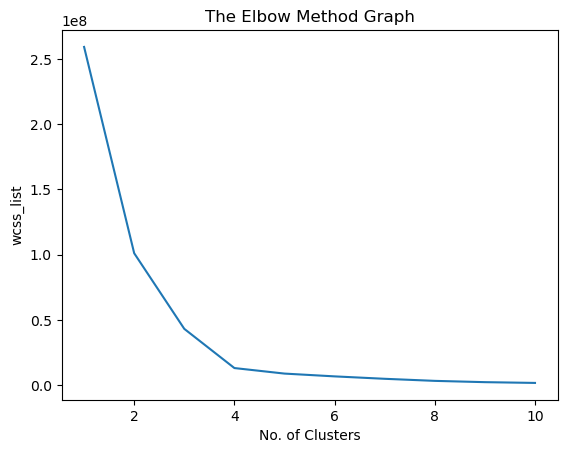

In [32]:
# finding optimal no. of clusters using elbow method 
from sklearn.cluster import KMeans
wcss_list=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42, n_init=10)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_list')
plt.show()

In [34]:
# training the K-Means model on a dataset

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_pred = kmeans.fit_predict(x)

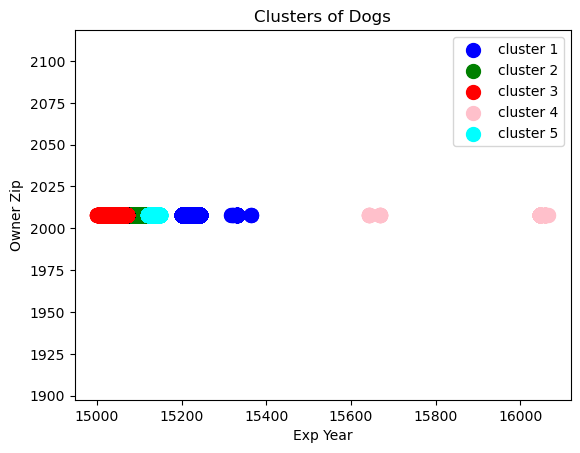

In [35]:
plt.scatter( x [ y_pred == 0 , 0 ], x [ y_pred == 0 , 1 ], s = 100 , c = 'blue' , label = 'cluster 1')
plt.scatter( x [ y_pred == 1 , 0 ], x [ y_pred == 1 , 1 ], s = 100 , c = 'green' , label = 'cluster 2')
plt.scatter( x [ y_pred == 2 , 0 ], x [ y_pred == 2 , 1 ], s = 100 , c = 'red' , label = 'cluster 3')
plt.scatter( x [ y_pred == 3 , 0 ], x [ y_pred == 3 , 1 ], s = 100 , c = 'pink' , label = 'cluster 4')
plt.scatter( x [ y_pred == 4 , 0 ], x [ y_pred == 4 , 1 ], s = 100 , c = 'cyan' , label = 'cluster 5')

plt.title('Clusters of Dogs')
plt.ylabel('Owner Zip')
plt.xlabel('Exp Year')
plt.legend()
plt.show()